In [ ]:
# POC 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
path= 'C:/Users/USER/Desktop/dataset/deepL/na_processing/'
train = pd.read_csv(path+'train_preprocessed.csv')
test = pd.read_csv(path+'test_preprocessed.csv')

In [27]:
split_point = train.shape[0]
data = pd.concat([train.drop('voted',axis=1),test],ignore_index=True) # train에서 voted 제외하고

In [28]:
data

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56907,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,1110,...,1,1,0,1,1,0,1,0,1,1
56908,1.0,314,5.0,554,5.0,230,1.0,956,2.0,1173,...,1,1,1,1,1,1,1,1,1,1
56909,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,829,...,1,1,0,1,1,0,1,0,1,1
56910,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,1185,...,1,0,0,1,1,0,1,1,1,0


In [29]:
EnV = train[['education','voted']]
EnV

,education,voted
0,2,2
1,4,2
2,3,1
3,4,1
4,3,1
...,...,...
45524,2,2
45525,2,2
45526,2,1
45527,4,1


In [30]:
EnV.voted.value_counts() # 1 yes / 2 no

2    24897
1    20632
Name: voted, dtype: int64

In [31]:
EnV.education.value_counts()

2    17007
3    15423
4     7967
1     5132
Name: education, dtype: int64

In [2]:
EnV.voted[EnV.voted == 2] = 0  

NameError: name 'EnV' is not defined

In [33]:
ratio = EnV.groupby(['education'],as_index=False).mean()
# 무응답(0)을 제외하고 교육수준이 높아질수록 투표율 증가함

ratio

,education,voted
0,1,0.051637
1,2,0.367143
2,3,0.595539
3,4,0.619807


[Text(0, 0, 'Less than high School'),
 Text(0, 0, 'High School'),
 Text(0, 0, 'University Degree'),
 Text(0, 0, 'Graduate Degree')]

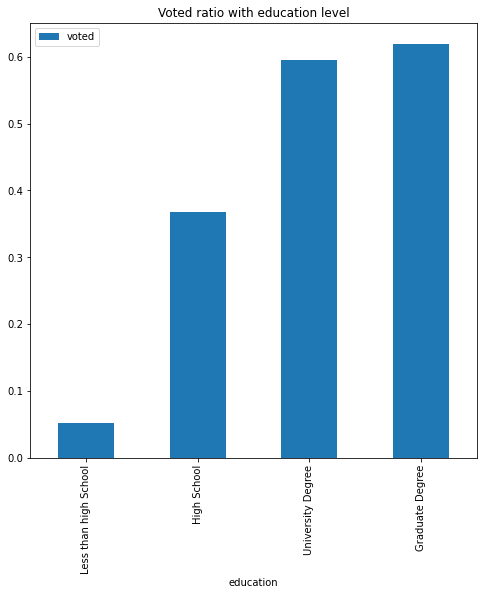

In [42]:

ax = ratio.plot(x='education',y='voted',
                kind='bar',              
                figsize=(8,8),                                    
                title='Voted ratio with education level')

ax.set_xticklabels(['Less than high School','High School','University Degree','Graduate Degree'])

In [ ]:
"""
학력과 투표율의 상관관계에서

고졸 미만과 고졸의 차이가 31.6%
고졸과 대학 졸업의 차이가 22.8%
대학과 대학원의 차이가 2.4% 로

학력이 증가할 수록 투표율은 높아지는 경향
학력이 증가할 때 학력 간 투표율의 차이는 좁혀진다.

"""

In [59]:
train.hand[train.hand == 2] = 0 

<ipython-input-59-6777a441a9dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.hand[train.hand == 2] = 0


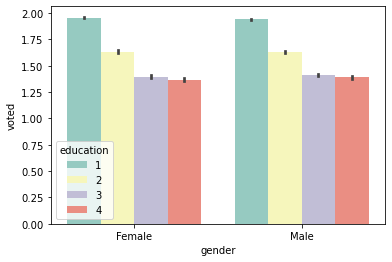

In [77]:
sns.barplot(x = 'gender', y = 'voted',
            data=train,
            hue='education',
            palette='Set3'
           )
#, palette='Set3'

'''
성별에 다른 투표율의 차이는 거의 없다 시피하다.
'''

In [65]:
train.gender

0        Female
1        Female
2          Male
3        Female
4          Male
          ...  
45524    Female
45525      Male
45526    Female
45527      Male
45528      Male
Name: gender, Length: 45529, dtype: object

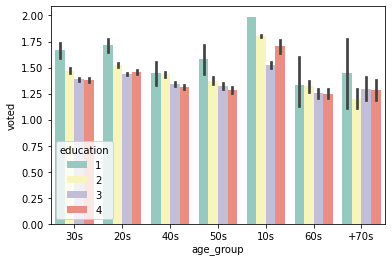

In [84]:
sns.barplot(x = 'age_group', y = 'voted',
            data=train,
            hue='education',
            palette='Set3',         
           )
#, palette='Set3'
# 10대의 투표율이 제일 낮음